<a href="https://colab.research.google.com/github/aqsa-isha/CodexCue-Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read the data
car_details = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
car_details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
# First five rows of dataset
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
# Last five rows of dataset
car_details.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
car_details.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [7]:
# Information of Dataset
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
# Shape of dataset
car_details.shape

(4340, 8)

In [9]:
# Description of dataset
car_details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
# Check for Missing Values
car_details.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


<Figure size 1000x700 with 0 Axes>

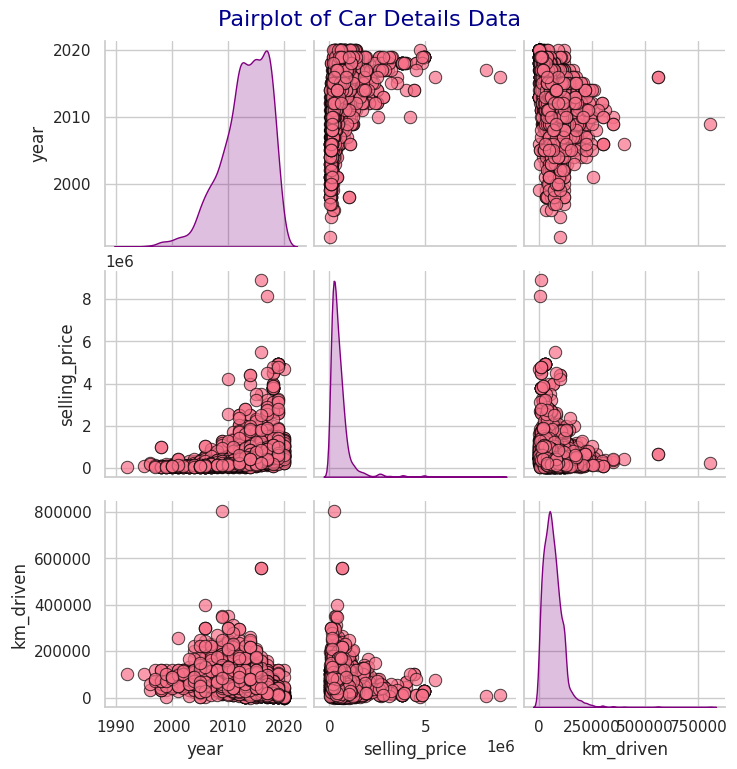

In [11]:
# Pair Plot of Car Details Data
sns.set(style="whitegrid", palette="husl")
plt.figure(figsize=(10, 7))
pairplot = sns.pairplot(car_details, diag_kind="kde", plot_kws={'alpha':0.7, 's':80, 'edgecolor':'k'}, diag_kws={'shade':True, 'color':'purple'})
pairplot.fig.suptitle('Pairplot of Car Details Data', y=1.02, fontsize=16, color='darkblue')
plt.show()


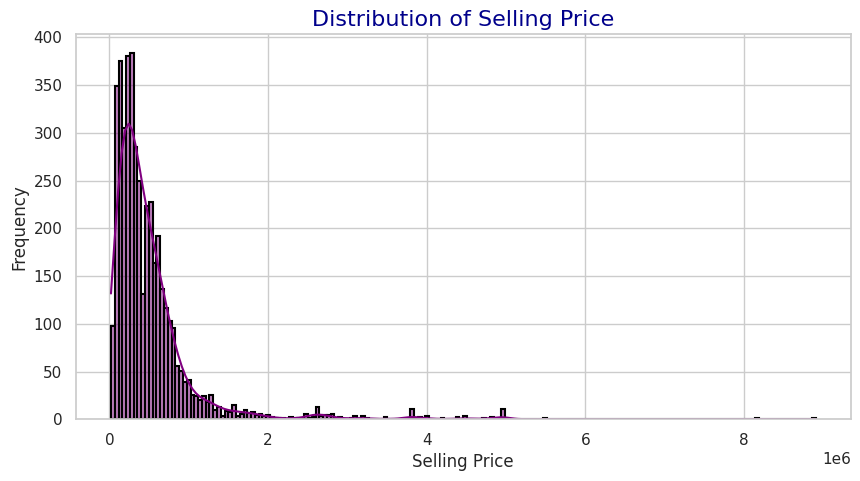

In [12]:
# Distribution of target variable i.e Selling Price
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.histplot(car_details['selling_price'], kde=True, color='purple', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Selling Price', fontsize=16, color='darkblue')
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


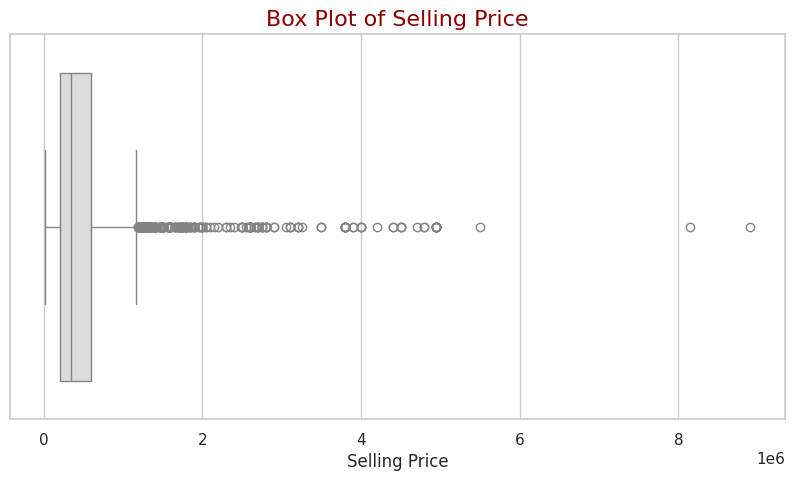

In [13]:
# Box plot to visualize selling price distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=car_details['selling_price'], palette='coolwarm')
plt.title('Box Plot of Selling Price', fontsize=16, color='darkred')
plt.xlabel('Selling Price', fontsize=12)
plt.show()


In [14]:
# Feature Engineering
# Add new feature
car_details['age'] = 2024 - car_details['year']
car_details = pd.get_dummies(car_details, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
car_details = car_details.drop(['name', 'year'], axis=1)

car_details.to_csv('processed_car_details.csv', index=False)

In [15]:
new_data = pd.read_csv('processed_car_details.csv')
new_data.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,17,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,17,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,12,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,7,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,10,True,False,False,False,True,False,True,False,True,False,False


In [16]:
X = new_data.drop('selling_price', axis=1)
y = new_data['selling_price']


In [25]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE: ", mean_squared_error(y_test, y_pred_rf, squared=False))

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting MAE: ", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting RMSE: ", mean_squared_error(y_test, y_pred_gb, squared=False))

Random Forest MAE:  169703.29089716304
Random Forest RMSE:  393420.4522617378
Gradient Boosting MAE:  175180.4293534786
Gradient Boosting RMSE:  397046.49390598375


#### Random Forest's predictions are closer to the actual values

In [30]:
# Cross-Validation for Model Validation
from sklearn.model_selection import cross_val_score

# Random Forest with Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV Mean Squared Error: ", -cv_scores_rf.mean())

# Gradient Boosting with Cross-Validation
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Gradient Boosting CV Mean Squared Error: ", -cv_scores_gb.mean())


Random Forest CV Mean Squared Error:  117603473842.71635
Gradient Boosting CV Mean Squared Error:  131929093735.85999


### Random Forest has a lower MSE than Gradient Boosting, which indicates that it performs better in cross-validation.